Consigna 1: Abstracto con motivación y audiencia

Motivación: Uno de los objetos de trabajo de la industria de los alimentos es lograr contratipar un producto de línea a partir de información nutricional. El hecho de poder encontrar una formulación base resolvería en gran medida el día a día de personas que se dedican al desarrollo de alimentos para la industria.

Audiencia: Personas que tengan el objetivo de desarrollar alimentos contratipando información nutricional de alimentos que podemos encontrar en góndolas de supermercados. 



Consigna 2: Preguntas/hipótesis que queremosresolver mediante el análisis de datos

Hipótesis: Necesito predecir formulaciones a partir de información nutricional dada. 

Contexto comercial:
El consumo de alimentos actual exige a la industria desarrollar continuamente productos que sean apetecibles. Una vez que se define el tipo de producto que se va a desarrollar, las características principales y el destino de consumo se debe proceder con la formulación. Hoy en día existen diversas formas de plantear este problema. Mi idea es que la primera posibilidad para resolver esta problemática sea generar un modelo en el cual alimento con la información nutricional que deseo obtener, un listado de ingredientes, características determinadas y el modelo me arroje posibles formulaciones target cuya info nutricional sea lo más cercana a la entregada. 


Problema comercial
Las empresas están obligadas a adecuarse a los requisitos regulatorios que tienen los alimentos determinados en el CAA. En los últimos años se aprobó la ley de etiquetado frontal con el fin de dar a los consumidores información valiosa relacionada a la calidad nutritiva del producto que se decide consumir.
Para cumplir con la ley de EF es necesario conocer de antemano la info nutricional del producto que se va a desarrollar. Habitualmente se conoce una vez que finaliza el proceso de desarrollo de producto. Esto genera problemas porque no siempre se cumple con los requisitos regulatorios y es por esto que planteo la posibilidad de colocar la variable "info nutricional"como eje principal para que el desarrollo de un alimento sea regulatoriamente aceptado. 
Es por esto que se requiere contar con una formulación estimada en función de la info nutricional dada para que el proceso de desarrollo de producto alimenticio tenga un punto de partida basado en la info nutricional y que esta no sea una consecuencia de la formulación planteada en el desarrollo.

Contexto analítico
Tengo una muestra de 7414 registros de alimentos categorizados que contienen su información nutricional. Las variables que voy a estar analizando son las calorías,los Carbohidratos, las Proteínas, los lípidos y el contenido de agua. Voy a presentar información resumida de cada variable
Previo a esto tengo que modificar alguna características del data set.

In [2]:
import pandas as pd
import os
ruta='C:\\Users\Maria\\Desktop\\Emi\\Data Scientist\\Coderhouse - Data Science\\Comisión 46270\\Datasets 2023'
os.chdir(ruta)
df1=pd.read_csv('food prueba simplificada.csv',sep=';')
df1.head(10)

,Category,Description,Nutrient Data Bank Number,Data_Carbohydrate,Data_Cholesterol,Data_Fiber,Data_Kilocalories,Data_Protein,Data_Sugar Total,Data_Water,Data_Fat_Monosaturated Fat,Data_Fat_Polysaturated Fat,Data_Fat_Saturated Fat,Data_Fat_Total Lipid
0,BUTTER,"BUTTER,WITH SALT",1001,"0,06",215,0,717,"0,85","0,059999999","15,87",21.021,3.043,51.368,"81,11"
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,"0,06",219,0,717,"0,85","0,059999999","15,87",23.426,3.012,50.489,"81,11"
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,256,0,876,"0,28",0,"0,24",28.732,3.694,61.924,"99,48"
3,CHEESE,"CHEESE,BLUE",1004,"2,34",75,0,353,"21,4","0,5","42,41",7.778,"0,8",18.669,"28,74"
4,CHEESE,"CHEESE,BRICK",1005,"2,79",94,0,371,"23,24","0,50999999","41,11",8.598,"0,784",18.764,"29,68"
5,CHEESE,"CHEESE,BRIE",1006,"0,45",100,0,334,"20,75","0,449999988","48,42",8.013,"0,826","17,41","27,68"
6,CHEESE,"CHEESE,CAMEMBERT",1007,"0,46",72,0,300,"19,8","0,460000008","51,8",7.023,"0,724",15.259,"24,26"
7,CHEESE,"CHEESE,CARAWAY",1008,"3,06",93,0,376,"25,18",0,"39,28",8.275,"0,83",18.584,"29,2"
8,CHEESE,"CHEESE,CHEDDAR",1009,"1,28",105,0,403,"24,9","0,519999981","36,75",9.391,"0,942",21.092,"33,14"
9,CHEESE,"CHEESE,CHESHIRE",1010,"4,78",103,0,387,"23,37",0,"37,65",8.671,"0,87",19.475,"30,6"


In [3]:
#Lo primero que voy a hacer es cambiar el tipo de dato str a float de los carbohidratos, las proteínas, los lípidos y el contenido de agua.
#Las Kcal también es una variable que se puede utilizar pero ya está como dato entero

df1['Data_Carbohydrate_fl'] = df1['Data_Carbohydrate'].str.replace(',', '.').astype(float)
df1['Data_Protein_fl'] = df1['Data_Protein'].str.replace(',', '.').astype(float)
df1['Data_Fat_Total Lipid_fl'] = df1['Data_Fat_Total Lipid'].str.replace(',', '.').astype(float)
df1['Data_Water_fl'] = df1['Data_Water'].str.replace(',', '.').astype(float)
print(df1.dtypes)

Category                       object
Description                    object
Nutrient Data Bank Number       int64
Data_Carbohydrate              object
Data_Cholesterol                int64
Data_Fiber                     object
Data_Kilocalories               int64
Data_Protein                   object
Data_Sugar Total               object
Data_Water                     object
Data_Fat_Monosaturated Fat     object
Data_Fat_Polysaturated Fat     object
Data_Fat_Saturated Fat         object
Data_Fat_Total Lipid           object
Data_Carbohydrate_fl          float64
Data_Protein_fl               float64
Data_Fat_Total Lipid_fl       float64
Data_Water_fl                 float64
dtype: object


In [4]:
#Ahora voy a eliminar las columnas transformadas a float.
df1 = df1.drop('Data_Carbohydrate', axis=1)
df1 = df1.drop('Data_Protein', axis=1)
df1 = df1.drop('Data_Water', axis=1)
df1 = df1.drop('Data_Fat_Total Lipid', axis=1)
df1.head(10)

,Category,Description,Nutrient Data Bank Number,Data_Cholesterol,Data_Fiber,Data_Kilocalories,Data_Sugar Total,Data_Fat_Monosaturated Fat,Data_Fat_Polysaturated Fat,Data_Fat_Saturated Fat,Data_Carbohydrate_fl,Data_Protein_fl,Data_Fat_Total Lipid_fl,Data_Water_fl
0,BUTTER,"BUTTER,WITH SALT",1001,215,0,717,"0,059999999",21.021,3.043,51.368,0.06,0.85,81.11,15.87
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,219,0,717,"0,059999999",23.426,3.012,50.489,0.06,0.85,81.11,15.87
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,256,0,876,0,28.732,3.694,61.924,0.00,0.28,99.48,0.24
3,CHEESE,"CHEESE,BLUE",1004,75,0,353,"0,5",7.778,"0,8",18.669,2.34,21.40,28.74,42.41
4,CHEESE,"CHEESE,BRICK",1005,94,0,371,"0,50999999",8.598,"0,784",18.764,2.79,23.24,29.68,41.11
5,CHEESE,"CHEESE,BRIE",1006,100,0,334,"0,449999988",8.013,"0,826","17,41",0.45,20.75,27.68,48.42
6,CHEESE,"CHEESE,CAMEMBERT",1007,72,0,300,"0,460000008",7.023,"0,724",15.259,0.46,19.80,24.26,51.80
7,CHEESE,"CHEESE,CARAWAY",1008,93,0,376,0,8.275,"0,83",18.584,3.06,25.18,29.20,39.28
8,CHEESE,"CHEESE,CHEDDAR",1009,105,0,403,"0,519999981",9.391,"0,942",21.092,1.28,24.90,33.14,36.75
9,CHEESE,"CHEESE,CHESHIRE",1010,103,0,387,0,8.671,"0,87",19.475,4.78,23.37,30.60,37.65


In [8]:
variable_target1 = df1['Data_Carbohydrate_fl']
variable_target2 = df1['Data_Kilocalories'] 
variable_target3 = df1['Data_Protein_fl']
variable_target4 = df1['Data_Water_fl']
variable_target5 = df1['Data_Fat_Total Lipid_fl']

In [9]:
print(variable_target1.describe(),
variable_target2.describe(),variable_target3.describe(),variable_target4.describe(),variable_target5.describe())

count    7413.000000
mean       21.785381
std        27.123491
min         0.000000
25%         0.490000
50%         9.290000
75%        30.590000
max       100.000000
Name: Data_Carbohydrate_fl, dtype: float64 count    7413.000000
mean      219.655875
std       171.668713
min         0.000000
25%        82.000000
50%       181.000000
75%       331.000000
max       902.000000
Name: Data_Kilocalories, dtype: float64 count    7413.000000
mean       10.809883
std        10.483772
min         0.000000
25%         2.130000
50%         7.270000
75%        18.580000
max        88.320000
Name: Data_Protein_fl, dtype: float64 count    7413.000000
mean       55.168469
std        30.906416
min         0.000000
25%        30.800000
50%        64.280000
75%        79.960000
max       100.000000
Name: Data_Water_fl, dtype: float64 count    7413.000000
mean       10.220476
std        16.499285
min         0.000000
25%         0.740000
50%         4.280000
75%        12.950000
max       100.000000
Nam

In [10]:
#Hago los histogramas de cada variable para ver la distribución de los datos

import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns

<Axes: xlabel='Data_Carbohydrate_fl', ylabel='Probability'>

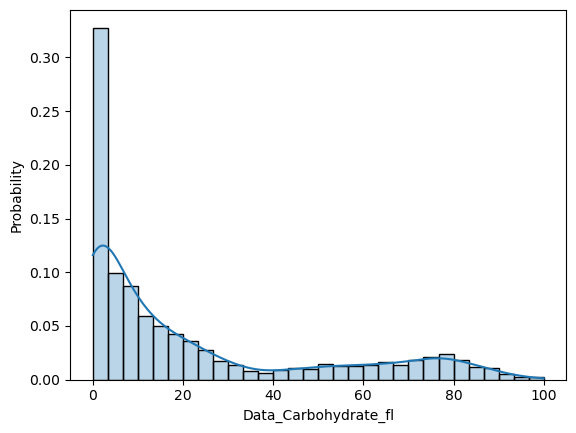

In [11]:
plt.figure()
sns.histplot(data = df1,
             x = 'Data_Carbohydrate_fl',
             alpha = 0.3,
             kde = True,
             stat = 'probability', 
             bins = 30)